In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
passengers = pd.read_csv('ausair.csv', index_col='Year', parse_dates=True)

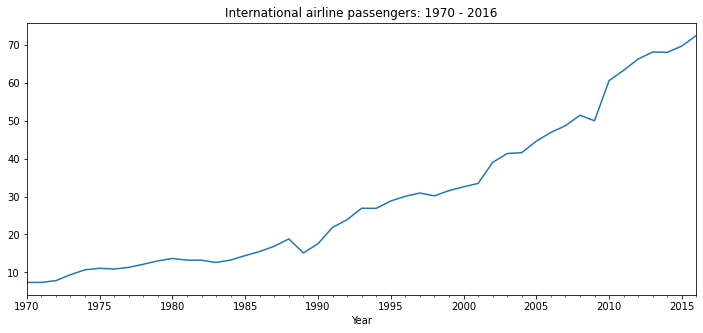

In [3]:
passengers['Passengers'].plot(figsize=(12,5))
plt.title('International airline passengers: 1970 - 2016')
plt.show()

# Задание №2

Постройте модель Хольта для линейного тренда с параметрами α = 0.59, β = 0.43.
Получите прогноз также на 10 лет вперед, отобразите на графике аппроксимацию
ряда моделью и прогноз. 

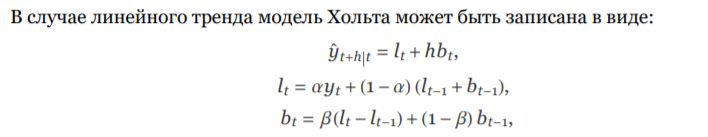

In [4]:
date_start=passengers.index[-1]+pd.DateOffset(years=1) #формируем столбец новых дат с 2017-2027
date_end=date_start+pd.DateOffset(years=10)
dates=pd.date_range(date_start,date_end,freq='YS')
new_dates=pd.DataFrame(dates)
new_dates.columns=['date']
new_dates=new_dates.set_index('date')

nn = np.empty(11) # строки с 2017-2027 заполним nan
nn.fill(np.nan)
new_df = pd.concat([passengers, new_dates]) #объединяем в единый DataFrame

In [5]:
a=0.59#параметры
b=0.43

In [6]:
y=passengers['Passengers'].values
len_y=len(y)
l=[]
tr=[]
tr.append(y[1]-y[0])
l.append(y[0])

for i in range(1,len_y): #находим уровень l и тренд для 1970-2015
    l.append(a*y[i]+(1-a)*(l[-1]+tr[-1]))
    tr.append(b*(l[-1]-l[-2])+(1-b)*tr[-1])
    
for i in range(11):#находим данные для 2017-2027
    y=np.append(y,l[-1]+tr[-1])
    l.append(a*y[-1]+(1-a)*(l[-1]+tr[-1]))
    tr.append(b*(l[-1]-l[-2])+(1-b)*tr[-1])    

new_df['lin']=l


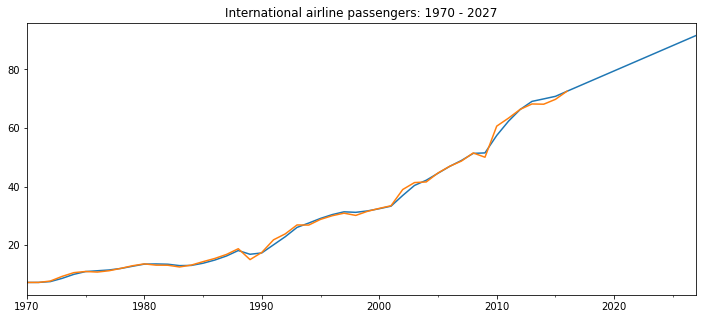

In [8]:
new_df['lin'].plot(figsize=(12,5)) #отрисовываем
new_df['Passengers'].plot(figsize=(12,5)) 
plt.title('International airline passengers: 1970 - 2027')
plt.show()

# Задание №3

Постройте модель Хольта для аддитивного затухающего тренда с параметрами α = 0.39, β = 0.10, ϕ = 0.9. Сравните аппроксимацию данной моделью и прогноз с результатами из задания 2.

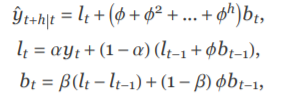

In [9]:
a=0.39#параметры
b=0.1
fi=0.9

In [10]:
y2=passengers['Passengers'].values
len_y2=len(y2)
l2=[]
tr2=[]
tr2.append(y2[1]-y2[0])
l2.append(y2[0])

for i in range(1,len_y2):#находим уровень l и тренд для 1970-2015          
    l2.append(a*y2[i]+(1-a)*(l2[-1]+fi*tr2[-1]))
    tr2.append(b*(l2[-1]-l2[-2])+(1-b)*fi*tr2[-1])
ff=fi    
for i in range(11):#находим данные для 2017-2027
    y2=np.append(y2,l2[-1]+fi*tr2[-1])
    l2.append(a*y2[-1]+(1-a)*(l2[-1]+fi*tr2[-1]))
    tr2.append(b*(l2[-1]-l2[-2])+(1-b)*fi*tr2[-1])

new_df['lin2']=l2

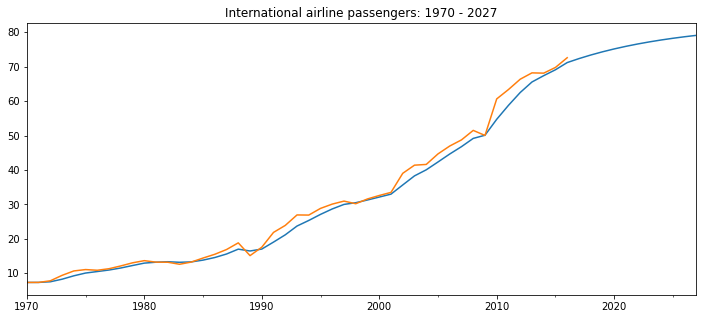

In [11]:
new_df['lin2'].plot(figsize=(12,5)) #отрисовываем
new_df['Passengers'].plot(figsize=(12,5)) 

plt.title('International airline passengers: 1970 - 2027')
plt.show()

Сравним  аппроксимацию данной моделью и прогноз с результатами из задания № 2.

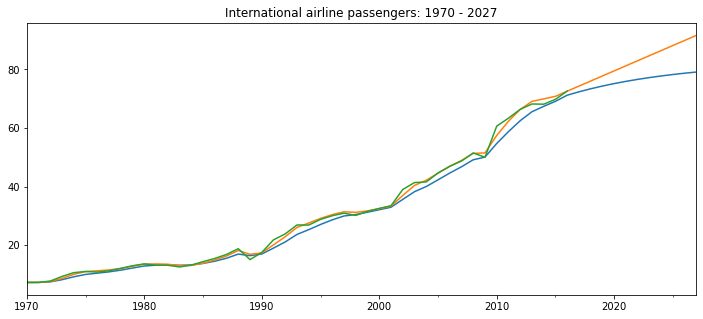

In [12]:
new_df['lin2'].plot(figsize=(12,5)) #отрисовываем
new_df['lin'].plot(figsize=(12,5)) #отрисовываем
new_df['Passengers'].plot(figsize=(12,5)) 

plt.title('International airline passengers: 1970 - 2027')
plt.show()